In [1]:
###seguno kpi

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format
random_state = 42
from datetime import date
import plotly.graph_objects as go
from plotly import offline as pyoff



from datetime import datetime, date, time, timedelta
import calendar

In [3]:
df=pd.read_csv('C:/Users/evive/Downloads/Nico y Juan/easyMoney/df_banc_rev.csv')

In [4]:
df['entry_date'] = pd.to_datetime(df['entry_date'])
df['Day_entry_date'] = df['entry_date'].dt.day
df['Year_entry_date'] = df['entry_date'].dt.year
df['Month_entry_date'] = df['entry_date'].dt.month

In [5]:
df['pk_partition'] = pd.to_datetime(df['pk_partition'])
df['Day_pk_partition'] = df['pk_partition'].dt.day
df['Year_pk_partition'] = df['pk_partition'].dt.year
df['Month_pk_partition'] = df['pk_partition'].dt.month

In [6]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
df.drop('entry_date', inplace=True, axis=1)

In [8]:
df.drop('pk_partition', inplace=True, axis=1)

In [9]:
print("Tamaño del conjunto de datos:  %d" % df.shape[0])
print("Número de variables: %d" % df.shape[1])
# Visualiza las primeras instancias
df.head()

Tamaño del conjunto de datos:  5956511
Número de variables: 70


,pk_cid,active_customer,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,...,revenue_payroll,revenue_payroll_account,revenue_total,unidades_vendidas_total,Day_entry_date,Year_entry_date,Month_entry_date,Day_pk_partition,Year_pk_partition,Month_pk_partition
0,15891,0.00,0,0,0,0,0,0,0,0.00,...,0.00,0,0.00,0.00,28,2018,7,28,2018,8
1,15891,1.00,0,0,0,0,0,0,0,0.00,...,0.00,0,10.00,1.00,28,2018,7,28,2018,7
2,16063,1.00,0,0,0,0,0,0,0,0.00,...,0.00,0,0.00,0.00,19,2018,11,28,2019,4
3,16063,1.00,0,0,0,0,0,0,0,0.00,...,0.00,0,0.00,0.00,19,2018,11,28,2018,11
4,16063,1.00,0,0,0,0,0,0,0,0.00,...,0.00,0,0.00,0.00,19,2018,11,28,2019,1


In [10]:
# Tamaño del conjunto de entrenamiento
training_size = int(len(df)*0.85)
# Desordena los datos (esto es muy importante).
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
# Copia los datos de test.
df_churn_new = df.iloc[training_size:].copy()
# Copia los datos para el entrenamiento del modelo.
df = df.iloc[:training_size].copy()

In [11]:
from sklearn.model_selection import train_test_split
# Tamaño del conjunto de entrenamiento
training_size = int(len(df)*0.85)
# Rebalancea los datos en el holdout
y = df["active_customer"]
X = df.drop("active_customer", axis=1)

X_train, X_test, y_train, y_test = train_test_split(
                                         X,
                                         y,
                                         train_size=training_size,
                                         random_state=42,
                                         shuffle=True,
                                         stratify=y)

In [12]:
print("Proporción True / False del conjunto de entremaniento: ", y_train.value_counts()[1]/y_train.value_counts()[0])
print("Proporción True / False del conjunto de validación: ", y_test.value_counts()[1]/y_test.value_counts()[0])

Proporción True / False del conjunto de entremaniento:  0.6759094764372217
Proporción True / False del conjunto de validación:  0.6759076796105579


In [14]:
df = X_train.copy()
df["active_customer"] = y_train
df_churn_new = X_test.copy()
df_churn_new["active_customer"] = y_test

In [15]:
print("Tamaño del conjunto de datos disponibles: ", len(df))
print("Tamaño del conjunto de nuevos datos: ", len(df_churn_new))

Tamaño del conjunto de datos disponibles:  4303578
Tamaño del conjunto de nuevos datos:  759456


In [16]:
# Lista de funciones aplicadas en el preprocesamiento
churn_data_preprocessing = []

# Características que serán consideradas categóricas y numéricas en el pipeline
cat_features = []
num_features = []

Clases:  [1. 0.]
El porcentaje de muestras positivas es 0.403309


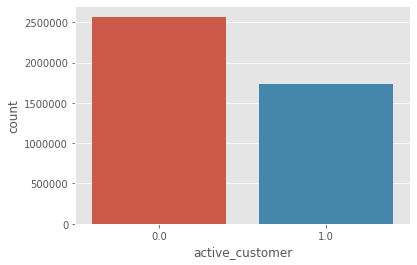

In [17]:
print("Clases: ", df['active_customer'].unique())

#
# COMPLETAR
#
sns.countplot("active_customer", data=df)

print("El porcentaje de muestras positivas es %f" % (sum(df['active_customer']) / df.shape[0]))

In [18]:
def churn_binarize_class(df):
    # COMPLETAR
    df["active_customer"] = df["active_customer"].astype(int)
    return df.T

# Comprueba si la función está bien
display(churn_binarize_class(df.head(10).copy()))

,200867,1650256,965216,377188,5007801,2607039,1326579,1513986,1865137,3381660
pk_cid,"1,420,820.00","331,227.00","1,159,264.00","1,069,127.00","1,455,495.00","1,381,103.00","1,150,501.00","1,193,957.00","1,536,694.00","1,222,243.00"
short_term_deposit,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
loans,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mortgage,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
funds,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
securities,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
long_term_deposit,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
credit_card,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
payroll,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
pension_plan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [19]:
df.dtypes

pk_cid                          int64
short_term_deposit              int64
loans                           int64
mortgage                        int64
funds                           int64
securities                      int64
long_term_deposit               int64
credit_card                     int64
payroll                       float64
pension_plan                  float64
payroll_account                 int64
emc_account                     int64
debit_card                      int64
em_account_p                    int64
em_acount                       int64
region_code                   float64
gender                          int64
age                             int64
deceased                        int64
salary                        float64
entry_channel_KHE               int64
entry_channel_KFC               int64
entry_channel_KHQ               int64
entry_channel_KAT               int64
entry_channel_KHK               int64
entry_channel_KHM               int64
entry_channe

In [20]:
numeric_types = ["int16", "int32", "int64", "float16", "float32", "float64"]
cat_df_columns = list(df.select_dtypes(exclude=numeric_types).columns.values) # COMPLETAR
num_df_columns = list(df.select_dtypes(include=numeric_types).columns.values) # COMPLETAR

print('Categóricas: ',cat_df_columns)
print('Numéricas: ',num_df_columns)

Categóricas:  []
Numéricas:  ['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account', 'debit_card', 'em_account_p', 'em_acount', 'region_code', 'gender', 'age', 'deceased', 'salary', 'entry_channel_KHE', 'entry_channel_KFC', 'entry_channel_KHQ', 'entry_channel_KAT', 'entry_channel_KHK', 'entry_channel_KHM', 'entry_channel_KHN', 'entry_channel_KFA', 'entry_channel_KHD', 'entry_channel_RED', 'entry_channel_KHL', 'entry_channel_KHF', 'entry_channel_KHO', 'entry_channel_KAZ', 'entry_channel_KHC', 'entry_channel_KBG', 'entry_channel_Others', 'segment_01 - TOP', 'segment_02 - PARTICULARES', 'segment_03 - UNIVERSITARIO', 'country_id_ES', 'country_id_GB', 'country_id_FR', 'country_id_DE', 'country_id_US', 'country_id_CH', 'country_id_Others', 'em_acount_revenue', 'em_account_p_revenue', 'revenue_emc_account', 'revenue_funds', 'revenue_loans', 'revenue_long_term_deposit', 'revenu

In [21]:
print("Imprimiendo el número de valores de cada variable numérica\n-------------------------------------------------")
for column in num_df_columns:
    print(f"Número de valores de {column.upper()}: {len(df[column].value_counts())}")

Imprimiendo el número de valores de cada variable numérica
-------------------------------------------------
Número de valores de PK_CID: 451776
Número de valores de SHORT_TERM_DEPOSIT: 2
Número de valores de LOANS: 2
Número de valores de MORTGAGE: 2
Número de valores de FUNDS: 2
Número de valores de SECURITIES: 2
Número de valores de LONG_TERM_DEPOSIT: 2
Número de valores de CREDIT_CARD: 2
Número de valores de PAYROLL: 2
Número de valores de PENSION_PLAN: 2
Número de valores de PAYROLL_ACCOUNT: 2
Número de valores de EMC_ACCOUNT: 2
Número de valores de DEBIT_CARD: 2
Número de valores de EM_ACCOUNT_P: 2
Número de valores de EM_ACOUNT: 2
Número de valores de REGION_CODE: 52
Número de valores de GENDER: 3
Número de valores de AGE: 104
Número de valores de DECEASED: 2
Número de valores de SALARY: 258406
Número de valores de ENTRY_CHANNEL_KHE: 2
Número de valores de ENTRY_CHANNEL_KFC: 2
Número de valores de ENTRY_CHANNEL_KHQ: 2
Número de valores de ENTRY_CHANNEL_KAT: 2
Número de valores de

In [22]:
df['region_code'].value_counts()

28.00    855772
8.00     433601
46.00    258640
30.00    214249
41.00    209343
15.00    183803
29.00    135377
36.00    126840
3.00     123883
11.00    116458
33.00     96722
50.00     95983
6.00      88666
35.00     88024
47.00     84450
18.00     74141
45.00     73947
37.00     66926
10.00     60268
14.00     54419
21.00     52028
2.00      52024
13.00     50776
39.00     50210
12.00     49808
7.00      45175
32.00     39380
27.00     38083
43.00     37418
17.00     36511
9.00      34257
25.00     33734
16.00     25917
24.00     25421
48.00     25305
26.00     25100
4.00      23600
31.00     22477
49.00     22373
23.00     22248
38.00     20796
34.00     19816
19.00     19294
40.00     15718
5.00      15413
22.00     15200
20.00     13630
1.00       9396
44.00      9077
42.00      6188
51.00      2125
52.00      1907
Name: region_code, dtype: int64

In [23]:
df['region_code'].fillna(value=0,inplace=True)

In [30]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4303578 entries, 200867 to 2747993
Data columns (total 70 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   pk_cid                      int64  
 1   short_term_deposit          int64  
 2   loans                       int64  
 3   mortgage                    int64  
 4   funds                       int64  
 5   securities                  int64  
 6   long_term_deposit           int64  
 7   credit_card                 int64  
 8   payroll                     float64
 9   pension_plan                float64
 10  payroll_account             int64  
 11  emc_account                 int64  
 12  debit_card                  int64  
 13  em_account_p                int64  
 14  em_acount                   int64  
 15  region_code                 float64
 16  gender                      int64  
 17  age                         int64  
 18  deceased                    int64  
 19  salary          

In [31]:
num_features.extend(num_df_columns)


print("Numéricas: ",num_features)

Numéricas:  ['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account', 'debit_card', 'em_account_p', 'em_acount', 'region_code', 'gender', 'age', 'deceased', 'salary', 'entry_channel_KHE', 'entry_channel_KFC', 'entry_channel_KHQ', 'entry_channel_KAT', 'entry_channel_KHK', 'entry_channel_KHM', 'entry_channel_KHN', 'entry_channel_KFA', 'entry_channel_KHD', 'entry_channel_RED', 'entry_channel_KHL', 'entry_channel_KHF', 'entry_channel_KHO', 'entry_channel_KAZ', 'entry_channel_KHC', 'entry_channel_KBG', 'entry_channel_Others', 'segment_01 - TOP', 'segment_02 - PARTICULARES', 'segment_03 - UNIVERSITARIO', 'country_id_ES', 'country_id_GB', 'country_id_FR', 'country_id_DE', 'country_id_US', 'country_id_CH', 'country_id_Others', 'em_acount_revenue', 'em_account_p_revenue', 'revenue_emc_account', 'revenue_funds', 'revenue_loans', 'revenue_long_term_deposit', 'revenue_mortgage', 'rev

In [32]:
from seaborn import kdeplot

C:\Users\evive\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\evive\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



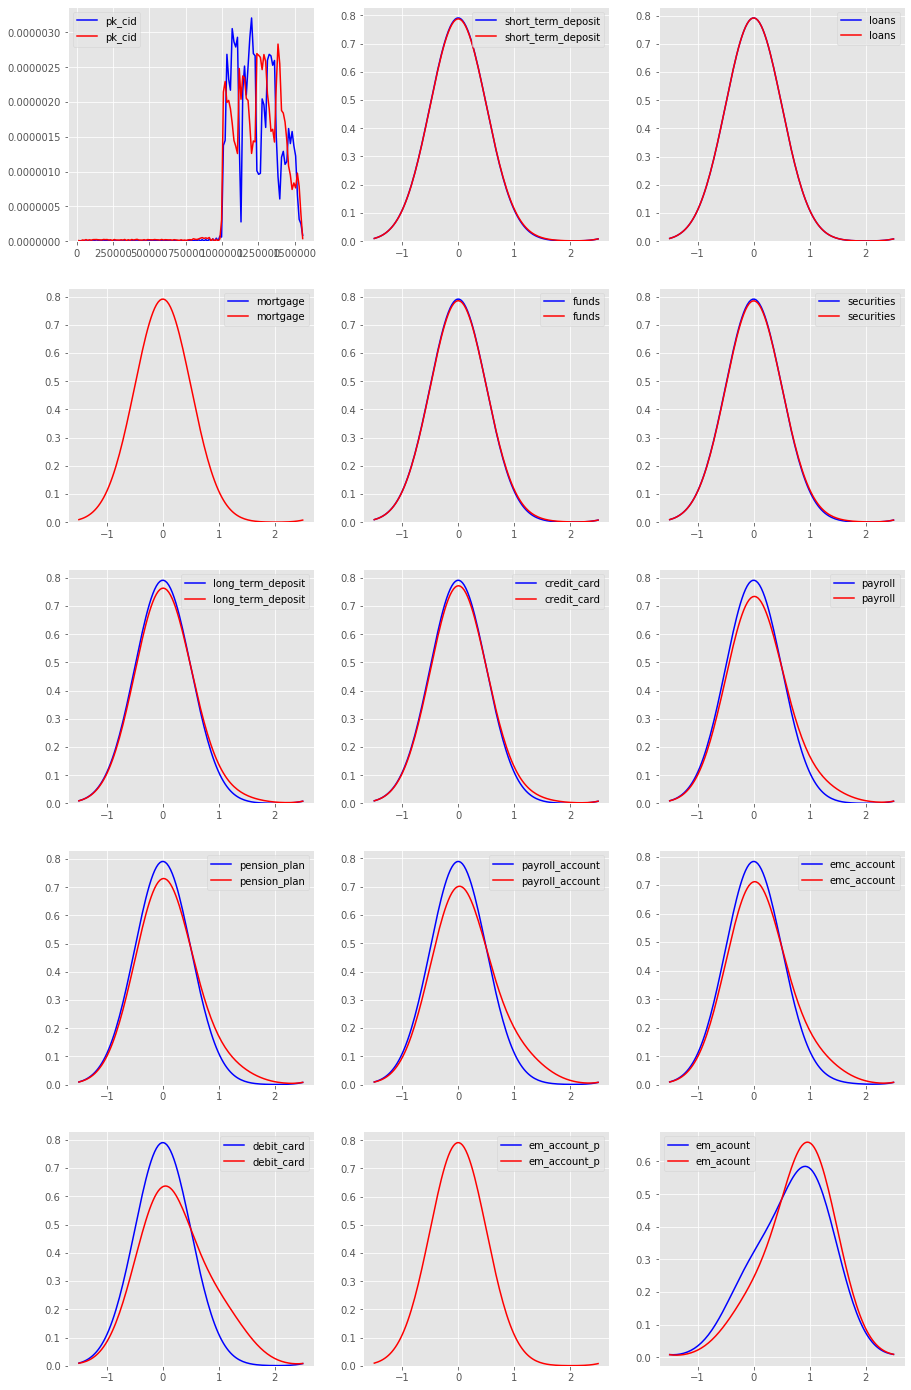

In [33]:
fig, axs = plt.subplots(5,3, figsize=(15, 25))

for col, ax in enumerate(axs.flatten()):
    col_name = num_features[col]
    #
    # COMPLETAR
    #
    sns.kdeplot(df[col_name].loc[df.active_customer == 0], ax=ax, color = 'b',bw= 0.5)
    sns.kdeplot(df[col_name].loc[df.active_customer == 1], ax=ax, color ='r',bw= 0.5)
    plt.plot()

In [34]:
num_features1 = ['region_code', 'gender', 'age', 'deceased', 'salary', 'entry_channel_KHE', 'entry_channel_KFC', 'entry_channel_KHQ', 'entry_channel_KAT', 'entry_channel_KHL', 'entry_channel_KHF', 'segment_01 - TOP', 'segment_02 - PARTICULARES', 'segment_03 - UNIVERSITARIO', 'country_id_ES']

In [35]:
col_name1 = num_features1[col]

[]

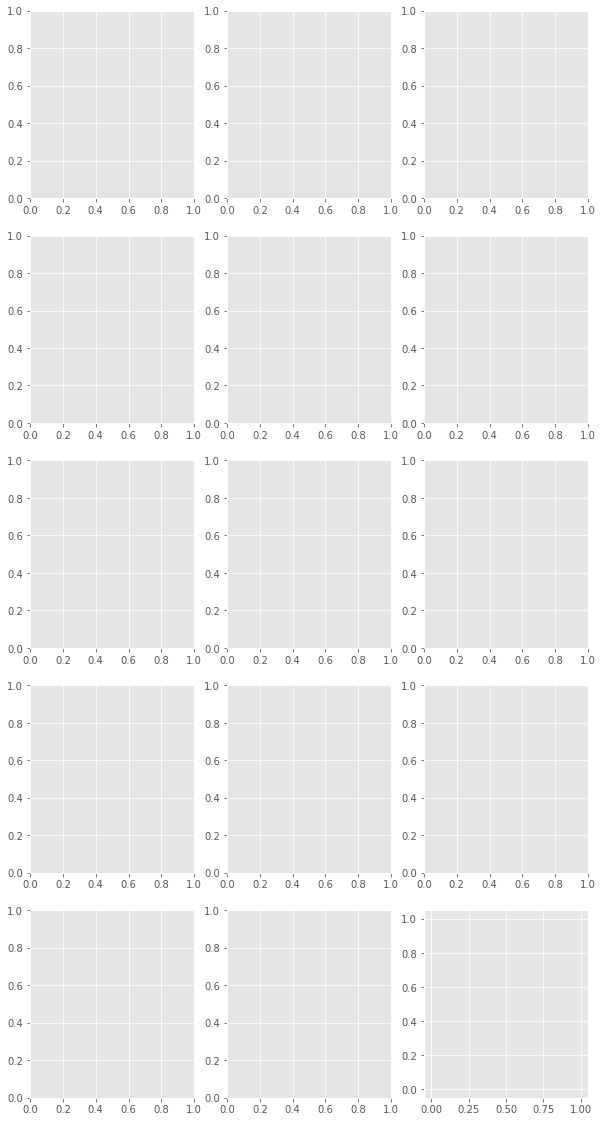

In [36]:

f, ax = plt.subplots(5, 3, figsize=(10, 20))

for col_name1, ax in enumerate(axs.flatten()):
    col_name1 = num_features1[col]

    #
    # COMPLETAR
    #
sns.kdeplot(df[col_name1].loc[df.active_customer == 0], ax=ax, color ='b',bw= 0.5)
sns.kdeplot(df[col_name1].loc[df.active_customer == 1], ax=ax, color ='r',bw= 0.5)
plt.plot()

In [37]:
print("Variables numéricas: ")
print(num_features)
print("\nVariables categóricas")
print(cat_features)

df.head()

Variables numéricas: 
['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account', 'debit_card', 'em_account_p', 'em_acount', 'region_code', 'gender', 'age', 'deceased', 'salary', 'entry_channel_KHE', 'entry_channel_KFC', 'entry_channel_KHQ', 'entry_channel_KAT', 'entry_channel_KHK', 'entry_channel_KHM', 'entry_channel_KHN', 'entry_channel_KFA', 'entry_channel_KHD', 'entry_channel_RED', 'entry_channel_KHL', 'entry_channel_KHF', 'entry_channel_KHO', 'entry_channel_KAZ', 'entry_channel_KHC', 'entry_channel_KBG', 'entry_channel_Others', 'segment_01 - TOP', 'segment_02 - PARTICULARES', 'segment_03 - UNIVERSITARIO', 'country_id_ES', 'country_id_GB', 'country_id_FR', 'country_id_DE', 'country_id_US', 'country_id_CH', 'country_id_Others', 'em_acount_revenue', 'em_account_p_revenue', 'revenue_emc_account', 'revenue_funds', 'revenue_loans', 'revenue_long_term_deposit', 'revenue_mortg

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,...,revenue_payroll_account,revenue_total,unidades_vendidas_total,Day_entry_date,Year_entry_date,Month_entry_date,Day_pk_partition,Year_pk_partition,Month_pk_partition,active_customer
200867,1420820,0,0,0,0,0,0,0,0.00,0.00,...,0,10.00,1.00,29,2018,7,28,2018,8,1.00
1650256,331227,0,0,0,0,0,0,0,0.00,0.00,...,0,0.00,0.00,9,2015,8,28,2018,11,0.00
965216,1159264,0,0,0,0,0,0,0,0.00,0.00,...,0,10.00,1.00,7,2016,8,28,2018,9,0.00
377188,1069127,0,0,0,0,0,0,0,0.00,0.00,...,0,10.00,1.00,27,2015,9,28,2019,1,0.00
5007801,1455495,0,0,0,0,0,0,1,0.00,0.00,...,0,140.00,4.00,21,2018,9,28,2019,5,1.00


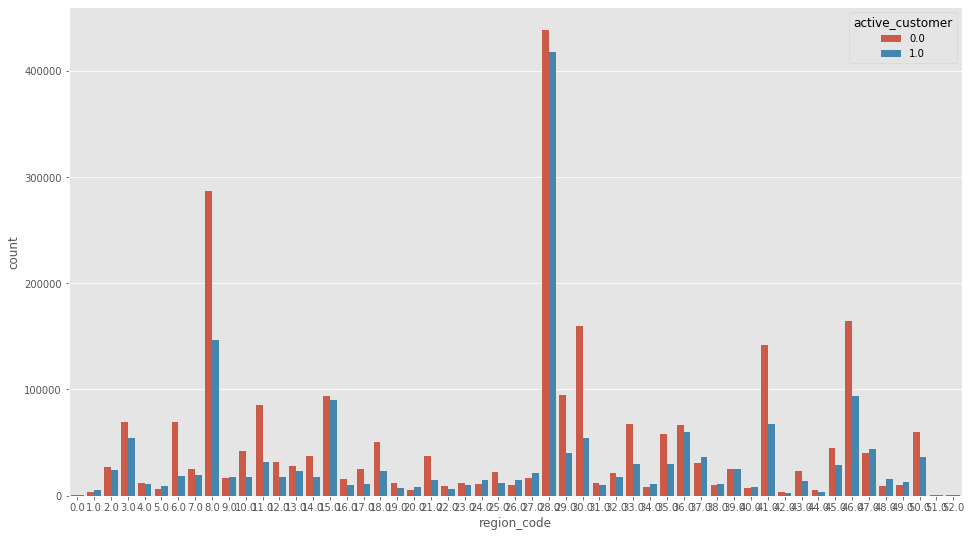

In [38]:

plt.figure(figsize=(16,9))
sns.countplot("region_code",hue="active_customer", data=df)

In [39]:
df.head(20).T

,200867,1650256,965216,377188,5007801,2607039,1326579,1513986,1865137,3381660,2837575,2114986,2318941,4390648,1496204,185451,1434287,1357358,1923747,4871323
pk_cid,"1,420,820.00","331,227.00","1,159,264.00","1,069,127.00","1,455,495.00","1,381,103.00","1,150,501.00","1,193,957.00","1,536,694.00","1,222,243.00","1,301,776.00","1,314,434.00","1,174,755.00","1,417,446.00","1,293,416.00","1,070,847.00","1,093,922.00","1,444,377.00","1,303,156.00","891,259.00"
short_term_deposit,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
loans,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mortgage,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
funds,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
securities,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
long_term_deposit,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
credit_card,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
payroll,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
pension_plan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [40]:
df.isnull().sum()

pk_cid                        0
short_term_deposit            0
loans                         0
mortgage                      0
funds                         0
securities                    0
long_term_deposit             0
credit_card                   0
payroll                       0
pension_plan                  0
payroll_account               0
emc_account                   0
debit_card                    0
em_account_p                  0
em_acount                     0
region_code                   0
gender                        0
age                           0
deceased                      0
salary                        0
entry_channel_KHE             0
entry_channel_KFC             0
entry_channel_KHQ             0
entry_channel_KAT             0
entry_channel_KHK             0
entry_channel_KHM             0
entry_channel_KHN             0
entry_channel_KFA             0
entry_channel_KHD             0
entry_channel_RED             0
entry_channel_KHL             0
entry_ch

In [41]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4303578 entries, 200867 to 2747993
Data columns (total 70 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   pk_cid                      int64  
 1   short_term_deposit          int64  
 2   loans                       int64  
 3   mortgage                    int64  
 4   funds                       int64  
 5   securities                  int64  
 6   long_term_deposit           int64  
 7   credit_card                 int64  
 8   payroll                     float64
 9   pension_plan                float64
 10  payroll_account             int64  
 11  emc_account                 int64  
 12  debit_card                  int64  
 13  em_account_p                int64  
 14  em_acount                   int64  
 15  region_code                 float64
 16  gender                      int64  
 17  age                         int64  
 18  deceased                    int64  
 19  salary          

In [42]:
churn_features = cat_features+num_features

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_transformer = Pipeline([
    ("preproc_standar_scalar", StandardScaler())
])

In [49]:
from sklearn.compose import ColumnTransformer
churn_trans = ColumnTransformer(transformers=[
                                                ("num", num_transformer, num_features)
                                ])

In [50]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression();

churn_pipe = Pipeline([
                    ("transformer", churn_trans),
                    ("model", lr_model)
])

In [54]:
X = df[churn_features]
y = df['active_customer']

# COMPLETAR
churn_pipe = Pipeline([
                    ("transformer", churn_trans),
                    ("model", lr_model).fit(X, y)])
return("Tasa de acierto:%3f"% churn_pipe.score(X, y))

AttributeError: 'tuple' object has no attribute 'fit'

In [55]:
print("El porcentaje de muestras negativas es %f" % (sum(df['active_customer'] == 0) / df.shape[0]))

El porcentaje de muestras negativas es 0.596691


In [59]:
def preprocess_data(df, churn_data_preprocessing):
    #
    # COMPLETAR
    #
    for func in churn_data_preprocessing:
        df = func(df)
    return df

In [60]:
from sklearn.metrics import accuracy_score
# Preprocessing test dataframe
df_churn_new_proc = preprocess_data(df_churn_new, churn_data_preprocessing)

# Separating attributes and the class variable
X_test = df_churn_new_proc[churn_features]
y_test = df_churn_new_proc["active_customer"]

#
#y_pred = churn_pipe.predict(X_test)

print("Tasa de acierto (validación): %.3f" % churn_pipe.score(X_test, y_test) )# accuracy_score(y_test, y_pred))

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def show_results(y, y_pred):
    #
    # COMPLETAR
    #
    print(f"Accuracy Score: {accuracy_score(y, y_pred)}")
    print(f"Precision Score: {precision_score(y, y_pred)}")
    print(f"Recall Score: {recall_score(y, y_pred)}")
    print(f"F1 Score: {f1_score(y, y_pred)}")

y_pred = churn_pipe.predict(X)
print("(Train)")
show_results(y, y_pred)
print("-------------------------------------------\n")
print("(Test)")
y_pred = churn_pipe.predict(X_test)
show_results(y_test, y_pred)

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [62]:
from sklearn.model_selection import train_test_split


In [63]:
from sklearn.model_selection import train_test_split
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42,
                                                    shuffle=True, # Barajamos el conjunto de datos. Añ
                                                    stratify=y # Repartimos equitativamente las clases
                                                   )
X_train = churn_trans.fit_transform(X_train)
X_test = churn_trans.transform(X_test)

In [64]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

seed = 42
cand_models = { 'SGD': {'clf': SGDClassifier(random_state=seed, max_iter=5),
                        'params': [{'max_iter': [50, 100, 1000], 'tol': [1e-3, 1e-4]}]},
                'Logistic regression': 
                       {'clf': LogisticRegression(random_state=seed),
                        'params': [{'tol': [0.001,0.0001,0.00001], 'C': np.linspace(0.0001,1.0,5)}]},
                'Decision tree': 
                       {'clf': DecisionTreeClassifier(random_state=seed),
                        'params': [{'max_depth': [None, 3, 5, 7]}]},
                'Random forest': 
                        {'clf': RandomForestClassifier(random_state=seed),
                        'params': [{'n_estimators': [10, 20, 50, 100], 'max_depth': [None, 3, 5, 7]}]}
                }

# Muestra los datos correspondientes a una entrada
print("Modelo: ", cand_models['Logistic regression']['clf'])
print("\nParámetros: ", cand_models['Logistic regression']['params'])

Modelo:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Parámetros:  [{'tol': [0.001, 0.0001, 1e-05], 'C': array([1.00000e-04, 2.50075e-01, 5.00050e-01, 7.50025e-01, 1.00000e+00])}]


In [65]:
from sklearn.model_selection import GridSearchCV

def search_model(X, y, model, params, scoring=None):
    
    # 
    # COMPLETAR
    #
    gs = GridSearchCV(model, params, scoring=scoring)
    # Training
    gs.fit(X,y)
    
    # The best model, score and params
    best_model = gs.best_estimator_
    best_score = gs.best_score_
    best_params = gs.best_params_
    
    return best_model, best_score, best_params


tested_model = 'Logistic regression'
clf = cand_models[tested_model]['clf']
params = cand_models[tested_model]['params']
scoring = 'accuracy'

model, score, params = search_model(X_train, y_train, clf, params, scoring=scoring)

print(f'Modelo: {model}\n')
print(f'Mejor score ({scoring}): {score:.3f}')

print("\nTest", end=' - ')

# Muestra los resultados de test
# 
# COMPLETAR
#
y_pred = model.predict(X_test)
show_results(y_test, y_pred)

Modelo: LogisticRegression(C=0.250075, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)

Mejor score (accuracy): 1.000

Test - Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


In [66]:
# Cojo el mejor modelo de los 4 posibles usando el score recall.
best_clf = None
best_score = 0
best_params = None
scoring = "recall"
for tested_model in cand_models:
    # Getting clf and parameters
    clf = cand_models[tested_model]['clf']
    params = cand_models[tested_model]['params']
    # Running GridSearch
    model, score, params = search_model(X_train, y_train, clf, params, scoring=scoring)
    
    # Getting best estimator
    if score > best_score:
        best_clf = model
        best_params = params
        best_score = score

print(f'Modelo: {best_clf}\n')
print(f'Mejor score ({scoring}): {best_score:.3f}')

print("\nTest", end=' - ')
y_pred = best_clf.predict(X_test)
show_results(y_test, y_pred)

KeyboardInterrupt: 

In [ ]:
churn_pipe = Pipeline([("preprocess", churn_trans), ("clf", best_clf)])

In [ ]:
df_churn_new = preprocess_data(df_churn_new, churn_data_preprocessing)
y_pred = churn_pipe.predict(df_churn_new.drop("active_customer", axis=1))
show_results(df_churn_new["active_customer"], y_pred)